## ❓ 8. Quantify network uncertainity (optional)

In [76]:
%matplotlib inline

In [83]:
from scipy.spatial.distance import jaccard
from framed.cobra.ensemble import load_ensemble
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

### Load models

In [88]:
## = comment
# = silenced code

## gut species
#organisms = ['B. uniformis', 'R. bromii', 'B. wexlerae', 'E. rectale', 'F. saccharivorans']

## normal gut models
#models = {
#    'B. uniformis': '../ensembles/ERR260255_bin.24.s.xml',
#    'R. bromii': '../ensembles/ERR260255_bin.7.p.xml',
#    'B. wexlerae': '../ensembles/ERR260255_bin.9.s.xml',
#    'E. rectale': '../ensembles/ERR260255_bin.19.p.xml',
#    'F. saccharivorans': '../ensembles/ERR260255_bin.14.p.xml'
#}

## impaired gut models
#models = {
#    'B. uniformis': '../ensembles/ERR260172_bin.10.p.xml',
#    'R. bromii': '../ensembles/ERR260172_bin.44.p.xml',
#    'B. wexlerae': '../ensembles/ERR260172_bin.7.s.xml',
#    'E. rectale': '../ensembles/ERR260172_bin.31.s.xml',
#    'F. saccharivorans': '../ensembles/ERR260172_bin.34.p.xml'
#}

## diabetes gut models
#models = {
#    'B. uniformis': '../ensembles/ERR260140_bin.3.s.xml',
#    'R. bromii': '../ensembles/ERR260140_bin.19.p.xml',
#    'B. wexlerae': '../ensembles/ERR260140_bin.13.s.xml',
#    'E. rectale': '../ensembles/ERR260140_bin.11.s.xml',
#    'F. saccharivorans': '../ensembles/ERR260140_bin.10.p.xml'
#}

## refseq gut models
#models = {
#    'B. uniformis': '../ensembles/GCF_018292165.1_ASM1829216v1_protein.xml',
#    'R. bromii': '../ensembles/GCF_002834225.1_ASM283422v1_protein.xml',
#    'B. wexlerae': '../ensembles/GCF_018785545.1_ASM1878554v1_protein.xml',
#    'E. rectale': '../ensembles/GCF_000020605.1_ASM2060v1_protein.xml',
#    'F. saccharivorans': '../ensembles/GCF_015557635.1_ASM1555763v1_protein.xml'
#}

# kefir species
#organisms = ['L. mesenteroides', 'L. lactis', 'A. fabarum', 'L. kefiranofaciens', 'L. kefiri']

## kefir models
#models = {
#    'L. mesenteroides': '../ensembles/230a_03182016.xml',
#    'L. lactis': '../ensembles/261_03182016.xml',
#    'A. fabarum': '../ensembles/290_03182016.xml',
#    'L. kefiranofaciens': '../ensembles/322b_03182016.xml',
#    'L. kefiri': '../ensembles/376_03182016.xml'
#}

## soil species
organisms = ['f__Thermoleophilaceae;g__', 'f__Herpetosiphonaceae;g__', 'f__Phormidiaceae;g__Microcoleus', 'f__Geodermatophilaceae;g__Geodermatophilus', 'f__Rubrobacteraceae;g__Rubrobacter_A']

## soil models
models = {
    'f__Thermoleophilaceae;g__': '../ensembles/ERR671933_bin.1.o.xml',
    'f__Herpetosiphonaceae;g__': '../ensembles/ERR671933_bin.2.o.xml',
    'f__Phormidiaceae;g__Microcoleus': '../ensembles/ERR671933_bin.3.s.xml',
    'f__Geodermatophilaceae;g__Geodermatophilus': '../ensembles/ERR671933_bin.4.o.xml',
    'f__Rubrobacteraceae;g__Rubrobacter_A': '../ensembles/ERR671933_bin.5.s.xml'
}

for label, model_file in models.items():
    models[label] =  load_ensemble(model_file, flavor='cobra')

### Compute distances

In [89]:
def ensemble_distance(ensemble):
    bin_matrix = [[int(ensemble.reaction_states[r_id][i])
                   for r_id in ensemble.reaction_states]
                  for i in range(ensemble.size)]
    
    distances = [jaccard(bin_matrix[i], bin_matrix[j])
                 for i in range(ensemble.size)
                 for j in range(i+1, ensemble.size)]
    
    return distances

In [90]:
dists = {label: ensemble_distance(model) for label, model in models.items()}

### Plot results

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

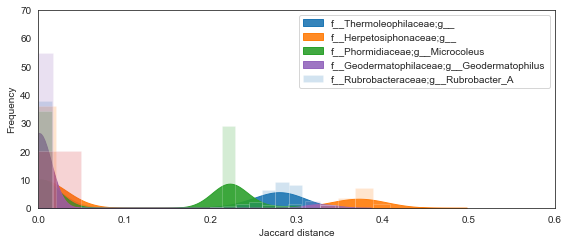

In [91]:
_, ax = plt.subplots(figsize=(8,3.5))

colors = sns.color_palette(n_colors=5)

for i, label in enumerate(organisms):
    sns.distplot(dists[label], ax=ax, bins=20, kde=True, norm_hist=True, color=colors[i],
                  hist_kws={'alpha': 0.2}, kde_kws={'shade': True, 'alpha':0.9})

ax.set_xlabel('Jaccard distance')
ax.set_ylabel('Frequency')
ax.legend(organisms)
ax.set_xlim(0,0.6)
ax.set_ylim(0,70)
plt.tight_layout()
plt.savefig('../plots/ensemble_dist/soil.png', dpi=300)